![logo](./images/OPTIMISE.%20Logo%20(green).png)

This is Notebook 2 out of 4 of this project.

# Optimise.
BUSINESS INTELLIGENCE SOLUTIONS

Optimise. uses data analysis to provide businesses a vision of their present operations and provides them with actionable advise based on meticulous analysis that produces tangible results.   

The analysis focuses on these main areas:     
- Product Analysis
    - Performance
    - Classification
    - Pricing
- Customer Analysis
    - Customer Profile
    - Customer Trends
    - Customer Lifetime Value
- Sales Analysis
    - Date/Time Overview
    - Discount Effeciency
    - Projections
    
The deliverables to be expected are a comprehensive report with useful visualizations, combined with specific recommendations based on the results obtained from the analysis.

# Data Analysis
In this part of the prject we will be working with the cleaned data set we created in part 1. It will focus on undertaking a full analysis of said data and extract relevant statistics, illustrative visualizations, and concise tables.

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

I will be importing these 3 separate files:
1. `steam_clean` is a cleaner version fo the original dataset 
2. `steam_cols_clean` is `steam_clean` but the categorical data has been separated in new columns, except tags.
3. `steam_tags_clean` is `steam_cols_clean` but the categorical data has been separated in new columns, including tags.

In [121]:
s = pd.read_csv("data/steam_clean.csv")
sc = pd.read_csv("data/steam_cols_clean.csv")
st = pd.read_csv('data/steam_tags_clean.csv')

In [143]:
s.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,15000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,7500000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,7500000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,7500000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,7500000,3.99


In [122]:
# grouping boolean columns by type

platforms = ['linux', 'windows', 'mac']
genres = ['Indie', 'Sports', 'Simulation', 'Strategy', 'Early Access', 'Casual',
       'RPG', 'Free to Play', 'Adventure', 'Action', 'Racing']
categories = ['Includes level editor', 'MMO', 'VR Support', 'Single-player',
       'Controller Support', 'Online', 'Multi-Player', 'co-op', 'Local']
tags = ['Nudity', 'Retro', 'Violent', 'Visual Novel', 'RPGMaker', 'Fighting',
       'FPS', 'Female Protagonist', 'Board Game', 'Space', 'World War II',
       'Platformer', 'Anime', 'Great Soundtrack', 'Massively Multiplayer',
       'Open World', 'Sexual Content', 'Arcade', 'Gore', 'Pixel Graphics',
       'Turn-Based', 'Music', 'Fantasy', 'Point & Click', 'Rogue-like',
       'World War I', "Shoot 'Em Up", 'RTS', 'Story Rich', 'Hidden Object',
       'Turn-Based Strategy', 'Survival', 'Match 3', 'Horror', 'Puzzle',
       'Sci-fi', 'Tower Defense', 'VR', 'Management', '2D', 'Card Game',
       'Multiplayer', 'Utilities', 'Shooter', 'War', 'Co-op', 'Zombies',
       'Classic', 'Singleplayer']

# General Overview

### Descriptive Statistics

In [123]:
s.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,2.707500e+04,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,1.340905e+05,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,1.328089e+06,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,1.000000e+04,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.000000e+04,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,1.000000e+04,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,3.500000e+04,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,1.500000e+08,421.990000


In [124]:
print()

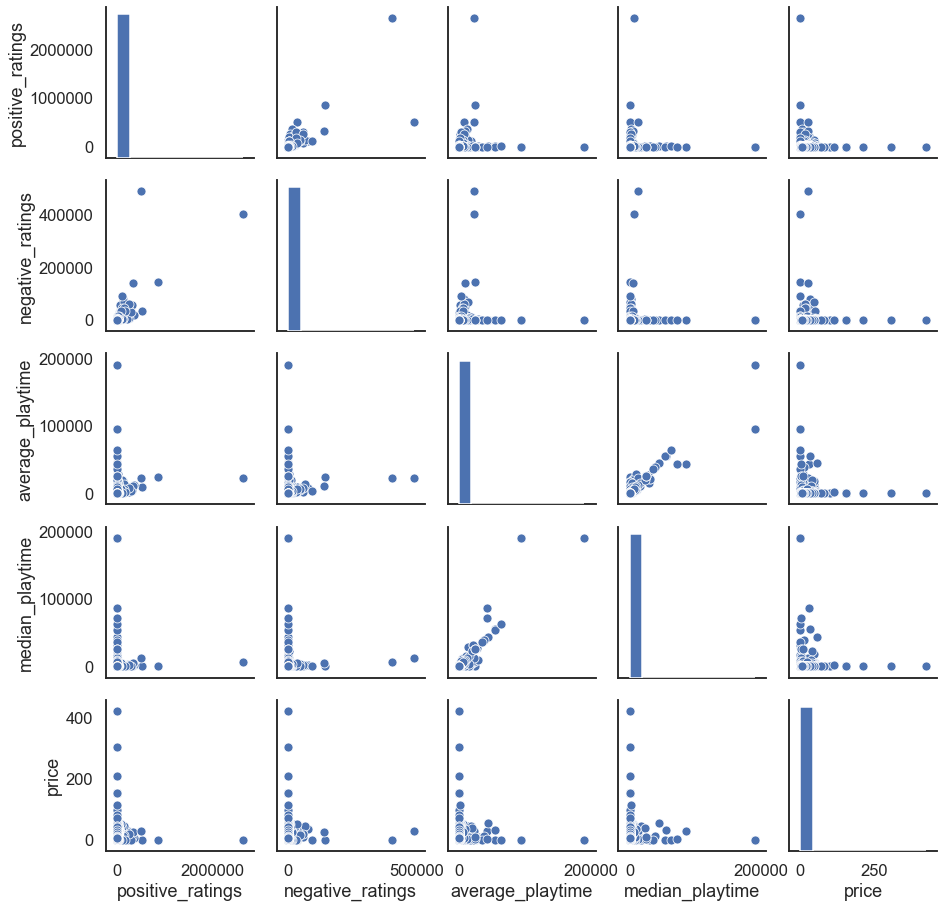

In [25]:
sns.pairplot(s[['positive_ratings','negative_ratings','average_playtime','median_playtime', 'price']])

### Top Performers

In [125]:
s.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

#### Platforms

In [130]:
df_platforms = {"platform" : platforms,
                "count" : [sum(sc[p]) for p in platforms],
                "count %": [sum(sc[p])/len(sc)*100 for p in platforms],
                "purchased": [sc[sc[p] == 1]["owners"].sum() for p in platforms],
                "purchased %": [sc[sc[p] == 1]["owners"].sum()/sum(sc["owners"])*100 for p in platforms]}

df_platforms = pd.DataFrame(df_platforms).sort_values("count", ascending=False)
df_platforms

,platform,count,count %,purchased,purchased %
1,windows,27070,99.981533,3630385000,99.996832
2,mac,8066,29.791320,1765540000,48.630767
0,linux,5235,19.335180,1425100000,39.253546


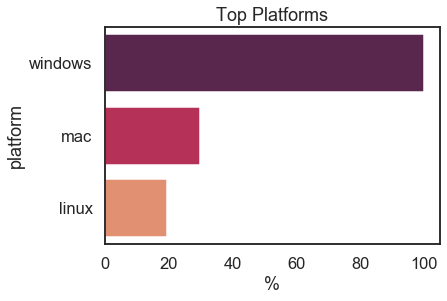

In [76]:
sns.set(style="white", context="talk")
pal = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)

# Generate barplot
sns.barplot(x="%", y="platform", palette="rocket", data=df_platforms, orient="h").set_title("Top Platforms")
#plt.savefig('./visuals/Top Platforms.png')

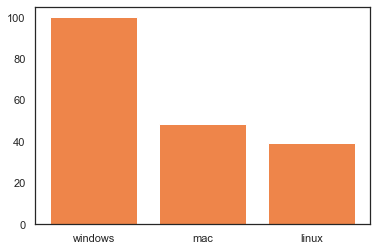

In [142]:
plt.bar(df_platforms["platform"], df_platforms["count %"])
plt.bar(df_platforms["platform"], df_platforms["purchased %"])
plt.show()

AttributeError: module 'seaborn' has no attribute 'show'

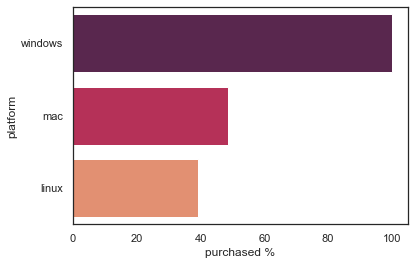

In [135]:
sns.barplot(x="count %", y="platform", palette="rocket", data=df_platforms, orient="h")
sns.barplot(x="purchased %", y="platform", palette="rocket", data=df_platforms, orient="h")
sns.show()

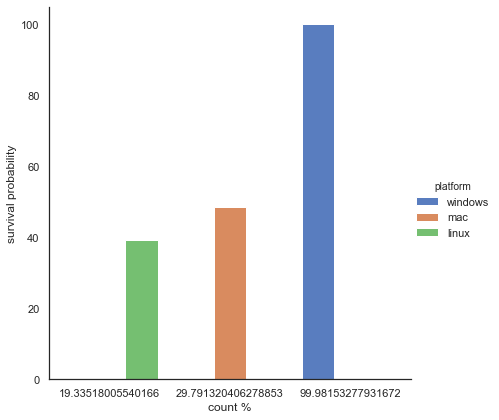

In [144]:
sns.catplot(x="count %", y="purchased %", hue="platform", data=df_platforms,
                height=6, kind="bar", palette="muted").set_ylabels("survival probability")
#g.despine(left=True)

#### Genres

In [49]:
df_genres = {"genre" : genres,
             "count" : [sum(sc[g]) for g in genres],
             "%" : [sum(sc[g])/len(sc)*100 for g in genres]}

df_genres = pd.DataFrame(df_genres).sort_values("count", ascending=False)
df_genres

,genre,count,%
0,Indie,19421,71.730379
9,Action,11903,43.963066
5,Casual,10210,37.710065
8,Adventure,10032,37.052632
3,Strategy,5247,19.379501
2,Simulation,5194,19.183749
6,RPG,4311,15.922438
4,Early Access,2954,10.910434
7,Free to Play,1704,6.293629
1,Sports,1322,4.882733


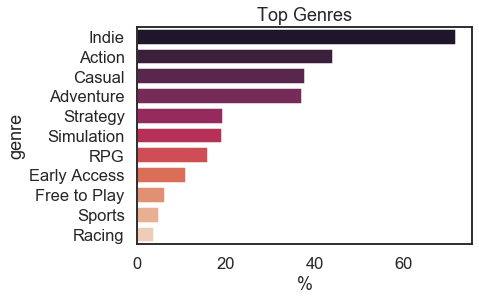

In [77]:
# Generate barplot
sns.barplot(x="%", y="genre", palette="rocket", data=df_genres, orient="h").set_title("Top Genres")

#### Categories

In [56]:
df_categories = {"category" : categories,
                 "count" : [sum(sc[c]) for c in categories],
                 "%" : [sum(sc[c])/len(sc)*100 for c in categories]}

df_categories = pd.DataFrame(df_categories).sort_values("count", ascending=False)
df_categories

,category,count,%
8,Local,25925,95.752539
3,Single-player,25678,94.840259
4,Controller Support,9914,36.616805
6,Multi-Player,6044,22.323176
5,Online,3025,11.172669
7,co-op,2604,9.617729
0,Includes level editor,1036,3.826408
1,MMO,421,1.554940
2,VR Support,231,0.853186


Text(0.5, 1.0, 'Top Categories')

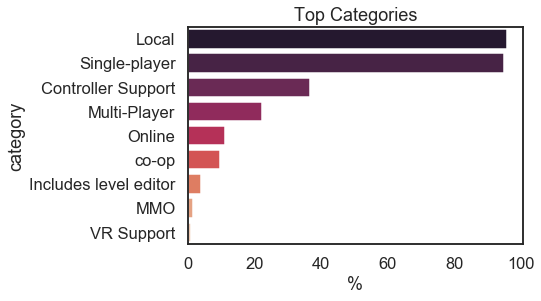

In [62]:
# Generate barplot
sns.barplot(x="%", y="category", palette="rocket", data=df_categories, orient="h").set_title("Top Categories")

#### Tags

In [63]:
df_tags = {"tag" : tags,
           "count" : [sum(st[t]) for t in tags],
           "%" : [sum(st[t])/len(st)*100 for t in tags]}

df_tags = pd.DataFrame(df_tags).sort_values("count", ascending=False)
df_tags

,tag,count,%
34,Puzzle,1167,4.310249
37,VR,964,3.560480
41,Multiplayer,850,3.139428
11,Platformer,738,2.725762
0,Nudity,570,2.105263
33,Horror,566,2.090489
16,Sexual Content,557,2.057248
3,Visual Novel,546,2.016620
2,Violent,545,2.012927
12,Anime,538,1.987073


Text(0.5, 1.0, 'Top Tags')

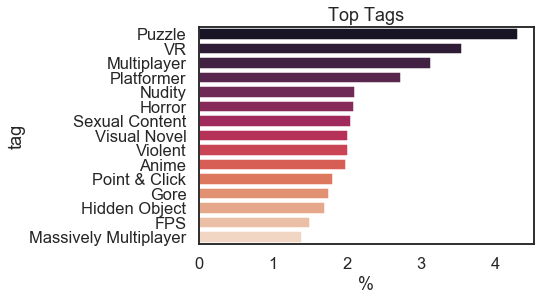

In [69]:
# Generate barplot
sns.barplot(x="%", y="tag", palette="rocket", data=df_tags[:15], orient="h", ).set_title("Top Tags")

### Top categorial objects

### Pivot Tables

**Observations:** Given that the number of unique values in this column is too high, I could unover the top publishers and assign the rest as `Other`.

# Data Visualization

In [89]:
s.head(1)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19


In [99]:
s["average_playtime"]

0        17612
1          277
2          187
3          258
4          624
         ...  
27070        0
27071        0
27072        0
27073        0
27074        0
Name: average_playtime, Length: 27075, dtype: int64

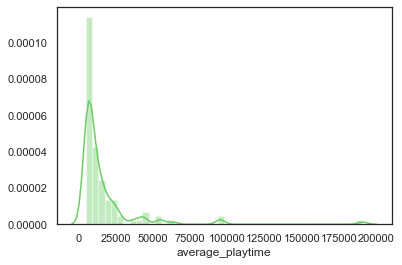

In [119]:
#sns.set(style="white", palette="muted", color_codes=True)

# Plot a histogram and kernel density estimate
sns.distplot((s[s["average_playtime"]>5000]["average_playtime"]), color="g")

In [ ]:
# add comparison of how many play 0, between 0 and 100, and the rest (percentage)